In [1]:
from sklearn.datasets import make_circles 

In [2]:
import matplotlib.pyplot as plt

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [4]:
X,Y=make_circles(n_samples=500,noise=0.02)

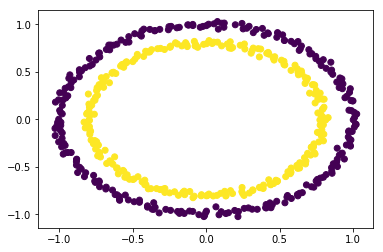

In [5]:
plt.scatter(X[:,0],X[:,1],c=Y)


In [6]:
def phi(X):
    x1=X[:,0]
    x2=X[:,1]
    x3=x1**2+x2**2
    X_=np.zeros((X.shape[0],3))
    X_[:,:2]=X
    X_[:,-1]=x3
    return X_
    

In [7]:
x_=phi(X)

In [8]:
print(x_[:3,:])

[[-0.78636162 -0.12388018  0.6337109 ]
 [-0.46925985  0.66286112  0.65958967]
 [ 0.88884393  0.39227634  0.94392426]]


In [9]:
def plot3d(X,show=True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    
    ax.scatter(X1,X2,X3,s=20,c=Y,depthshade=True)
    if(show==True):
        plt.show()
    return ax

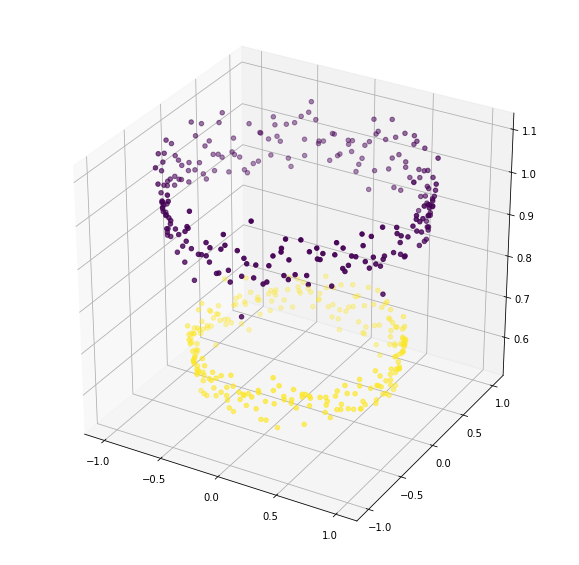

In [10]:
o=plot3d(x_)

In [11]:
from sklearn import svm

In [12]:
s=svm.SVC(kernel="linear")

In [13]:
s.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
s.score(X,Y)

0.506

In [15]:
s=svm.SVC(kernel="rbf")
s.fit(X,Y)
s.score(X,Y)

1.0

In [16]:
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))

svc = svm.SVC(kernel=custom_kernel)
svc.fit(X,Y)
svc.score(X,Y)
    

1.0

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [18]:
lr=LogisticRegression()

In [19]:
acc=cross_val_score(lr,X,Y,cv=5)

In [20]:
print("accuracy: " ,acc.mean()*100)

accuracy:  45.800000000000004


In [21]:
#logistic classifier on higher dimension
acc=cross_val_score(lr,x_,Y,cv=5)

In [22]:
print("accuracy: ",acc.mean()*100)

accuracy:  100.0


In [23]:
lr.fit(x_,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
w=lr.coef_
print(w)
b=lr.intercept_
print(b)

[[-0.02273872  0.01225176 -8.89660015]]
[7.18843361]


In [25]:
xx,yy=np.meshgrid(np.arange(-2,2),np.arange(-2,2))

In [26]:
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [29]:
z=-(w[0][0]*xx+w[0][1]*yy+b)/w[0][2]
print(z)

[[0.81035535 0.80779946 0.80524357 0.80268768]
 [0.81173248 0.80917659 0.8066207  0.80406481]
 [0.81310961 0.81055372 0.80799783 0.80544194]
 [0.81448674 0.81193085 0.80937496 0.80681907]]


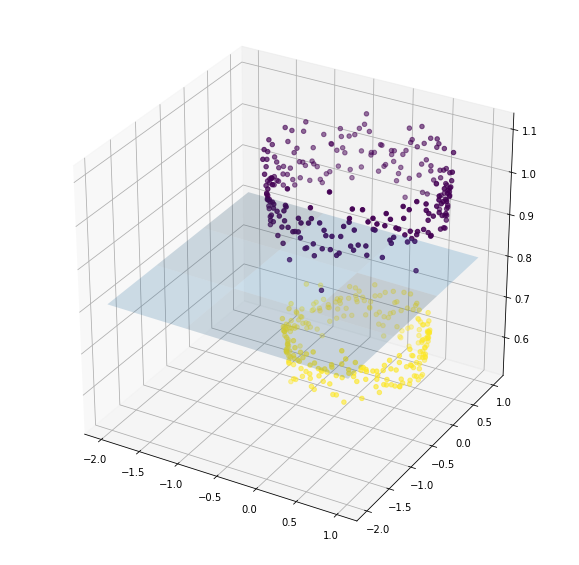

In [30]:
ax=plot3d(x_,show=False)
ax.plot_surface(xx,yy,z,alpha=0.2)
plt.show()

In [32]:
from sklearn.model_selection import GridSearchCV
import multiprocessing

In [33]:
cpus=multiprocessing.cpu_count()

In [52]:
params=[
    {
    
    'kernel':['linear','rbf','poly','sigmoid'],    
        'C':[0.1,0.2,0.5,1,2,5]

}]

In [53]:
gs=GridSearchCV(estimator=svm.SVC(), param_grid=params, scoring="accuracy", n_jobs=5, cv=5)

In [54]:
gs.fit(X,Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=5,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.5, 1, 2, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [55]:
gs.best_estimator_

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
gs.best_score_

1.0